<a href="https://colab.research.google.com/github/Subhansini/python-Projects/blob/main/Handwritten_text_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!pip install transformers
!pip install plot-keras-history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from plot_keras_history import show_history, plot_history
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

Training Part

In [ ]:
dir = '/content/gdrive/MyDrive/dataset2/Train'
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [ ]:
def p_m(history, num_epochs):
   accuracy = history.history['accuracy']
   precision = history.history['precision']
   recall = history.history['recall']
   auc = history.history['auc']
   i = num_epochs-1
   performance_metrics = [accuracy[i], precision[i], recall[i], auc[i]]
   print(performance_metrics)
   plot_history(history, path="standard.png")
   return performance_metrics

In [ ]:
val_dir = '/content/gdrive/MyDrive/dataset2/Validation'
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [ ]:
len(train_data)
len(val_data)

In [ ]:
random.shuffle(train_data)
random.shuffle(val_data)

In [ ]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [ ]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [ ]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [ ]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [ ]:
print(train_X.shape,val_X.shape)

In [ ]:
print(train_Y.shape,val_Y.shape)

# ANN Model

In [ ]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import models
from keras import layers
import tensorflow as tf

In [ ]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]

In [ ]:
def ANN():
    # create model
    model = Sequential()
    model.add(Conv2D(256, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

    model.add(Flatten())
    model.add(Dense(35, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy','Precision','Recall','AUC'])
    return model

ANN_model = ANN()

print(ANN_model.summary())

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
ANN_history1 = ANN_model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
9646/9646 [==============================] - 1074s 111ms/step - loss: 0.5719 - accuracy: 0.8255 - precision: 0.8832 - recall: 0.7803 - auc: 0.9908 - val_loss: 0.5091 - val_accuracy: 0.8621 - val_precision: 0.8944 - val_recall: 0.8346 - val_auc: 0.9904
Epoch 2/50
9646/9646 [==============================] - 1004s 104ms/step - loss: 0.3590 - accuracy: 0.8876 - precision: 0.9146 - recall: 0.8647 - auc: 0.9951 - val_loss: 0.4518 - val_accuracy: 0.8766 - val_precision: 0.9033 - val_recall: 0.8517 - val_auc: 0.9916
Epoch 3/50
9646/9646 [==============================] - 979s 102ms/step - loss: 0.3334 - accuracy: 0.8939 - precision: 0.9189 - recall: 0.8732 - auc: 0.9956 - val_loss: 0.4373 - val_accuracy: 0.8769 - val_precision: 0.9067 - val_recall: 0.8500 - val_auc: 0.9924
Epoch 4/50
9646/9646 [==============================] - 1033s 107ms/step - loss: 0.3241 - accuracy: 0.8971 - precision: 0.9216 - recall: 0.8767 - auc: 0.9957 - val_loss: 0.4081 - val_accuracy: 0.8790 - val_precis

[0.8813217282295227, 0.9074541330337524, 0.8600554466247559, 0.9938973784446716]


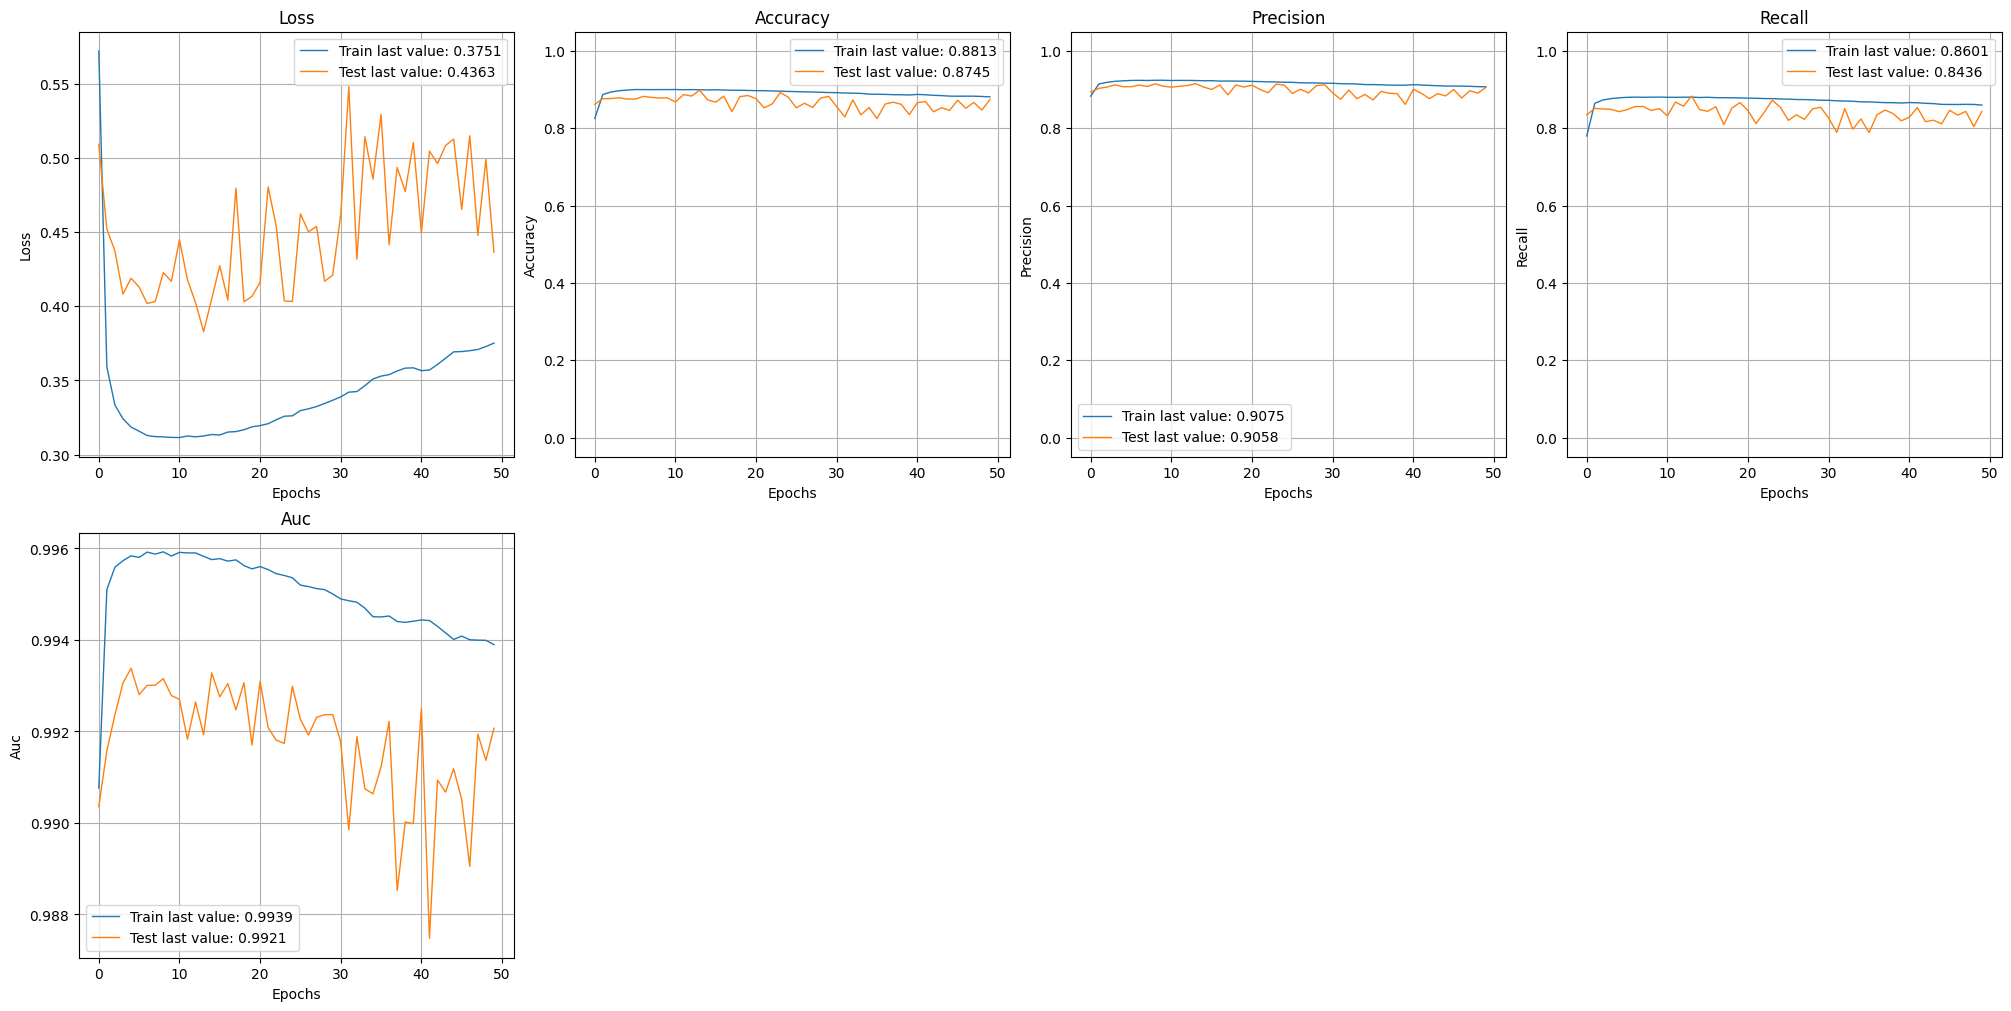

In [ ]:
pref = p_m(ANN_history1,50)

In [ ]:
ANN_model.save("ANN_handwriting_det_model.hdf5")

## Recognition Part


In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/machine.jpeg')

OSError: ignored

In [ ]:
%%capture
import cv2
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

def predict(img_path):
    image = Image.open(img_path).convert("RGB")
    print("The Image selected is displayed below :")
    display(image)
    pixel_values = processor(image, return_tensors="pt").pixel_values
    predict_ids = model.generate(pixel_values)
    predicted_text = processor.batch_decode(predict_ids, skip_special_tokens=True)[0]
    print("Predicted Text : ",predicted_text)

def get_word(letter):
    word = "".join(letter)
    return word

In [ ]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 15:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image


The Image selected is displayed below :


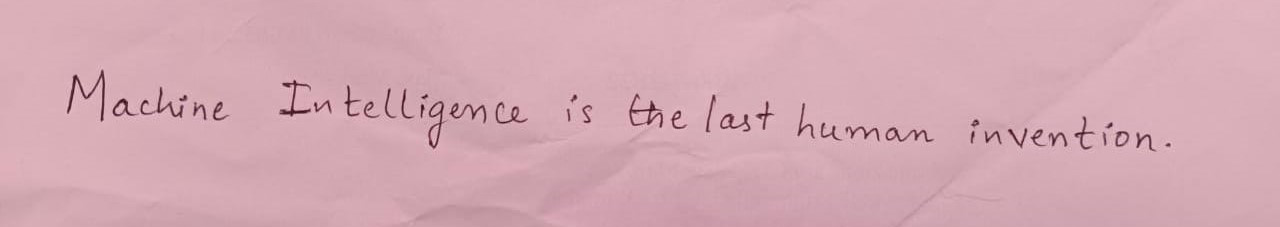

Predicted Text :  Machine Intelligence is the last human invention.


In [ ]:
predict('/content/gdrive/MyDrive/machine 2.jpeg')